In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fredapi import Fred
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# set the end date to today
end_date = datetime.now()

# convert the end date to a string in the format 'YYYY-MM-DD'
end_date = end_date.strftime('%Y-%m-%d')

# Define the start date as 50 years ago
start_date = (datetime.strptime(end_date, "%Y-%m-%d") - timedelta(days=365*50)).strftime('%Y-%m-%d')

# Create an instance of the FRED class
fred = Fred(api_key='6a58db9c85745819db30352da7fef223')

<h3>Indicators</h3>
<ul>
    <li>Unemployment rate</li>
    <li>Gross Domestic Product (GDP)</li>
    <li>Consumer Price Index (CPI)</li>
    <li>Industrial Production Index</li>
    <li>Durable goods orders</li>
    <li>Consumer Confidence Index</li>
    <li>ISM Manufacturing Index</li>
</ul>

In [138]:
# create a dictionary to store indicators
indicators = {
    'UNRATE': 'Unemployment rate',
    'CPIAUCNS': 'Consumer Price Index (CPI)',
    'INDPRO': 'Industrial Production Index',
    'DGORDER': 'Durable goods orders',
    'UMCSENT': 'Consumer Confidence Index',
    'MANEMP': 'Institute for Supply Management (ISM) Manufacturing Index',
    'HOUST': 'Housing Starts',
    'PERMIT': 'Building Permits',
}

In [139]:
# create an empty dictionary to store the dataframes
dfs = {}

# loop through the indicators
for key, value in indicators.items():
    try:
        # retrieve data using the key as the series identifier
        data = pd.DataFrame(fred.get_series(key, start_date=start_date, end_date=end_date))
        # add the data to the dfs dictionary using the value as the key
        dfs[value] = data
    except:
        print(f"{value} not found")

# Print the keys of the dfs dictionary
print(dfs.keys())

dict_keys(['Unemployment rate', 'Consumer Price Index (CPI)', 'Industrial Production Index', 'Durable goods orders', 'Consumer Confidence Index', 'Institute for Supply Management (ISM) Manufacturing Index', 'Housing Starts', 'Building Permits'])


<h3>Statistical Analysis</h3>

In [140]:
# Perform descriptive statistics and cleanup on all dataframes
for key, value in dfs.items():
    # remove rows with missing values
    value.dropna(inplace=True)
    # reset the index
    value.reset_index(drop=True, inplace=True)
    # update the dfs dictionary with the cleaned data
    dfs[key] = value
    print(f"{key} statistics:")
    print(value.describe())

Unemployment rate statistics:
                0
count  900.000000
mean     5.732889
std      1.703267
min      2.500000
25%      4.400000
50%      5.500000
75%      6.800000
max     14.700000
Consumer Price Index (CPI) statistics:
                 0
count  1320.000000
mean     85.280902
std      83.142260
min       9.700000
25%      17.500000
50%      34.000000
75%     152.500000
max     298.012000
Industrial Production Index statistics:
                 0
count  1248.000000
mean     45.201364
std      34.454187
min       3.691600
25%      13.715700
50%      38.578650
75%      77.589350
max     104.829200
Durable goods orders statistics:
                   0
count     370.000000
mean   197338.735135
std     36236.807528
min    114535.000000
25%    171619.000000
50%    196838.500000
75%    225774.500000
max    303162.000000
Consumer Confidence Index statistics:
                0
count  631.000000
mean    85.911094
std     12.705076
min     50.000000
25%     76.550000
50%     89.400000
7

In [141]:
# # Visualize all dataframes
# for key, value in dfs.items():
#     value.plot()
#     plt.title(key)
#     plt.show()

<h3>Time Series Analysis</h3>    

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


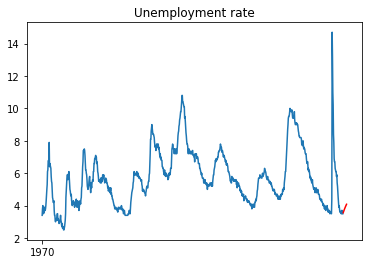

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


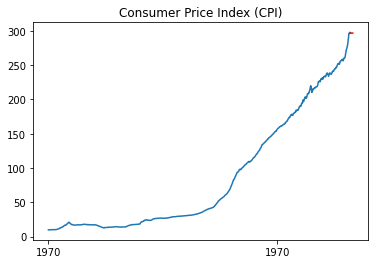

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


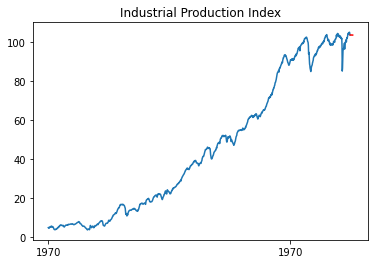

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


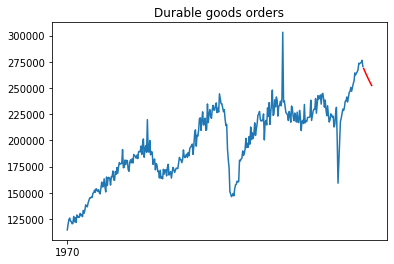

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


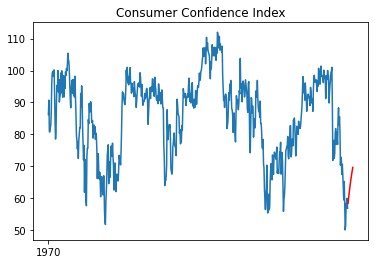

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


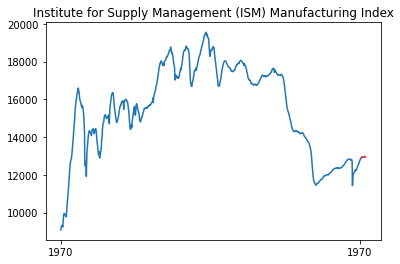

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


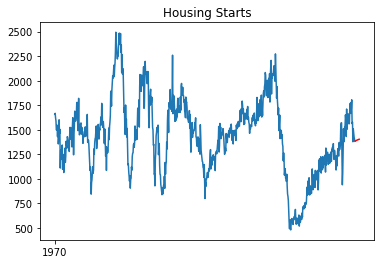

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


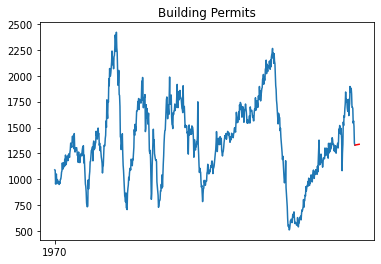

In [144]:
interval = 5
# loop through the dataframes in the dfs dictionary
for key, df in dfs.items():
    adf_test = sm.tsa.stattools.adfuller(df)
    # print("ADF test p-value: ", adf_test[1])
    # fit the ARIMA model to the data
    model = ARIMA(df, order=(1, 0, 0))
    model_fit = model.fit()
    
    # make predictions
    predictions = model_fit.predict(start=len(df), end=len(df)+10, dynamic=False)
    
    # plot the predictions against the actual data
    plt.plot(df)
    plt.plot(predictions, color='red')
    plt.title(key)
    plt.show()